# Multilayer Perceptron -  Manual - Base Binária

### Atualização dos pesos por iteração

### Importação das bibliotecas necessárias

In [1]:
import pandas as pd
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

### Carregamento da base

In [2]:
base = pd.read_csv('baseBinaria.txt')
entradas = base.iloc[:, 0:len(base.columns) -1].values 
classes = base.iloc[:,len(base.columns)-1].values
NumColunas = len(base.columns) - 1

### Padronização dos dados

In [3]:
for i in range (len(base.columns)-1):
    entradas[:,i] = (entradas[:,i] - np.median(entradas[:,i]))/entradas[:,i].std(axis = 0)

### Transformação das classes para o tipo dummy

In [4]:
labelEncoder = LabelEncoder()
classes = labelEncoder.fit_transform(classes)
classes_dummy = np.array(pd.get_dummies(classes))

### Plotagem dos dados (colunas 1 e 2)

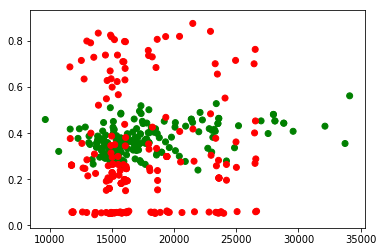

In [5]:
x = base.iloc[:,3].values
y = base.iloc[:,4].values

color= ['red' if l == 1 else 'blue' if l == 2 else 'green' for l in classes]
plt.scatter(x, y, color=color)

### Divisão da base em treinamento (80%) e teste (20%)

In [6]:
entradas_trei, entradas_test, classes_trei, classes_test = train_test_split(entradas, classes_dummy, test_size=0.20)

### Métodos e demais variáveis necessárias

In [7]:
def unique(list1):   
    unique_list = [] 
    for x in list1: 
        if x not in unique_list: 
            unique_list.append(x) 
    return x

In [8]:
def funcaoAtivacao(soma, Usu_func):
    if (Usu_func == 1):
        return 1/(1 + np.exp(-soma))
    if (Usu_func == 2):
        return ((1 - np.exp(-soma))/(1 + np.exp(-soma)))
    return 0

In [9]:
def derivadaParcial(camadaSaida, Usu_func):
    if (Usu_func == 1):
        return camadaSaida * (1 - camadaSaida)
    if (Usu_func == 2):
        return 1/2 * (1 - (camadaSaida)**2)

## Dados do usuário

In [10]:
NumClasses = unique(classes) + 1
epocas = int(input('\033[1m' + "Digite a quantidade de épocas: "))
taxaAprendOcul = float(input('\033[1m' + "Digite a taxa de aprendizado da camada oculta: "))
taxaAprendSai = float(input('\033[1m' + "Digite a taxa de aprendizado da camada de saída: "))
print('\033[1m' + "Digite a quantidade de Neurônios da camada oculta: ")
print("1- Regra do Valor Médio")
print("2- Regra de Kolmogorov")
print("3- Regra de Fletcher-Gloss")
print("4- Regra da Raiz quadrada")
print("5- Inserir um valor manualmente")
escolha = int(input(""))
if (escolha == 1):
        # Regra do valor médio
        qtde =  int((NumClasses + NumColunas)/2)
if (escolha == 2):
        # Regra de Kolmogorov
        qtde =  int((2 * NumColunas) + 1)
if (escolha == 3):
        # Regra de Fletcher-Gloss
        a = int((2* (NumColunas ** (1/2)) + NumClasses))
        b = 2 * NumColunas + 1
        qtde = int(randint(a, b))      
if (escolha == 4):
        # Regra da raiz quadrada
        qtde = int((NumClasses * NumColunas)**(1/2))
if (escolha == 5):
        qtde = int(input("Digite a quantidade de neurônios que deseja inserir"))
NeuroniosCamadaOculta = qtde
print(NeuroniosCamadaOculta)
print('\033[1m' + "Função de ativação: ")
print("1- Logística")
print("2- Tangente Hiperbólica")
Usu_func = int(input("Digite o valor: "))

Digite a quantidade de épocas: 100
Digite a taxa de aprendizado da camada oculta: 0.5
Digite a taxa de aprendizado da camada de saída: 0.3
Digite a quantidade de Neurônios da camada oculta: 
1- Regra do Valor Médio
2- Regra de Kolmogorov
3- Regra de Fletcher-Gloss
4- Regra da Raiz quadrada
5- Inserir um valor manualmente
2
43
Função de ativação: 
1- Logística
2- Tangente Hiperbólica
Digite o valor: 1


In [11]:
PesoBiasOculta = np.dot((-0.5 + (0.5 + 0.5)), np.random.random((NeuroniosCamadaOculta,1)))

pesos0 = np.dot((-0.5 + (0.5 + 0.5)), np.random.random((NumColunas,NeuroniosCamadaOculta)))
pesos1 = np.dot((-0.5 + (0.5 + 0.5)), np.random.random((NeuroniosCamadaOculta, NumClasses)))
lb_style = LabelBinarizer()
classes_trei = lb_style.fit_transform(classes_trei)
num_entradas_trei = len(entradas_trei)
camadaSaida = np.zeros((num_entradas_trei, NumClasses))

## Treinamento

Erro Médio: 0.13499233381877565


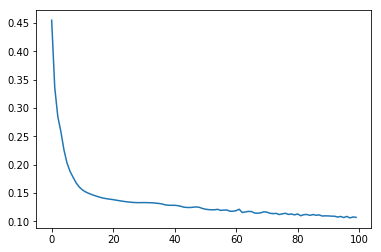

In [12]:
mediaErro = np.zeros(epocas)
Erro = np.zeros(num_entradas_trei)
for i in range(epocas):
 #   print("Época: "+ str(i))    
    for j in range(num_entradas_trei):     
        # Feed Foward
        entrada = entradas_trei[j].reshape(1,NumColunas)
        somaSinapse0 = np.dot(entrada, pesos0)        
        camadaOculta = funcaoAtivacao(somaSinapse0 - PesoBiasOculta.T, Usu_func)  
        soma = np.dot(camadaOculta, pesos1)
        camadaSaida[j]  = funcaoAtivacao(soma, Usu_func)

        # Back Propagation
        erroCamadaSaida = classes_trei[j] - camadaSaida[j]
        Erro[j] =  np.mean(np.abs(erroCamadaSaida))
        
        derivadaSaida  = derivadaParcial(camadaSaida[j], Usu_func)
        GradienteSaida = derivadaSaida * erroCamadaSaida
        GradienteSaida = GradienteSaida.reshape(1,NumClasses) 
        pesos1 = pesos1 + taxaAprendSai * camadaOculta.T * GradienteSaida 
        DerivadaOculta = derivadaParcial(camadaOculta, Usu_func)
        GradienteOculta = (DerivadaOculta.T * (np.dot(pesos1, GradienteSaida.T)))
        pesos0 = pesos0 + taxaAprendOcul * (entrada.T * GradienteOculta.T);   
    mediaErro[i] = np.mean(np.abs(Erro))    
print("Erro Médio: "+ str(np.mean(np.abs(mediaErro))))
plt.plot(mediaErro)

### Organização das Saídas para plotagem da Matriz de Confusão

In [13]:
classesN = [np.argmax(t) for t in classes_trei]

print(classesN)

[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0]


In [14]:
SaidasCalcTrein =  [np.argmax(t) for t in camadaSaida]
print(SaidasCalcTrein)

[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0]


In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):   

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Saída correta')
    plt.xlabel('Saída encontrada')    

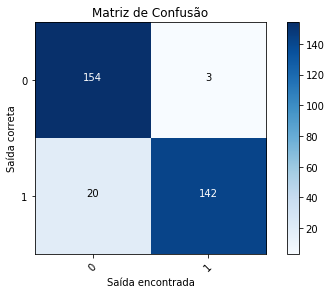

In [16]:
cm = confusion_matrix(classesN, SaidasCalcTrein)
plot_confusion_matrix(cm, 
                      classes=['0', '1'],
                      title='Matriz de Confusão')

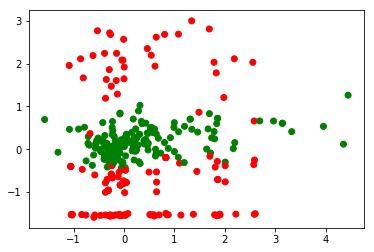

In [17]:
cores = np.array(['green', 'red', 'blue'])

x = entradas_trei[:,3]
y = entradas_trei[:,4]

plt.scatter(x, y, color= cores[SaidasCalcTrein]) 

## Testes

In [18]:
num_entradas_test = len(entradas_test)
camadaSaidaTest = np.zeros((num_entradas_test, NumClasses))

for j in range(num_entradas_test):     
    # Feed Foward
    entrada = entradas_test[j].reshape(1,NumColunas)
    somaSinapse0 = np.dot(entrada, pesos0)        
    camadaOculta = funcaoAtivacao(somaSinapse0 + PesoBiasOculta.T, Usu_func)        
    camadaSaidaTest[j]  = funcaoAtivacao(np.dot(camadaOculta, pesos1), Usu_func)
    
# cálculo do erro
erroCamadaSaida = classes_test - camadaSaidaTest

# Média absoluta do erro
mediaErro = np.mean(np.abs(erroCamadaSaida))
print("Média Absoluta do Erro: "+ str(mediaErro))

Média Absoluta do Erro: 0.18590165986096538


### Organização das Saídas para plotagem da Matriz de Confusão

In [19]:
classesN = [np.argmax(t) for t in classes_test]

In [20]:
SaidasCalcTest =  [np.argmax(t) for t in camadaSaidaTest]

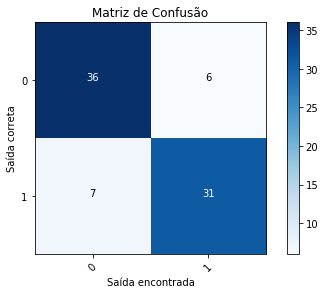

In [21]:
cm = confusion_matrix(classesN, SaidasCalcTest)
plot_confusion_matrix(cm, 
                      classes=['0', '1'],
                      title='Matriz de Confusão')

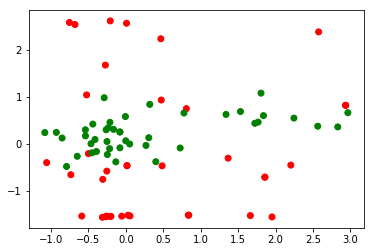

In [22]:
cores = np.array(['green', 'red', 'blue'])

x = entradas_test[:,3]
y = entradas_test[:,4]

plt.scatter(x, y, color= cores[SaidasCalcTest]) 